In [1]:
import torch
import torchvision as torchv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import Tensor
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

c:\Users\47472\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def custom_cross_entropy(x, y): 
    long_prob = -1.0 * F.log_softmax(x, 1)
    loss = long_prob.gather(1, y.unsqueeze(1))
    loss = loss.mean()
    return loss

In [3]:
def custom_loss(x,y):
    loss = torch.mean((x-y)**2)
    return loss

In [4]:
def temp():
    loss = nn.CrossEntropyLoss()
    pred0 = []
    for i in range(11):
        pred0.append([round(0.1*i,1),0])
    pred0 = torch.FloatTensor(pred0)
    labels0 = torch.LongTensor(np.zeros(len(pred0)))
    
    plotable0 = []
    for i in range(len(pred0)):
        plotable0.append(loss(pred0[i].unsqueeze(0),labels0[i].unsqueeze(0)))

    
    pred1 = []
    for i in range(11):
        pred1.append([round(0.1*i,1),1])
    pred1 = torch.FloatTensor(pred1)
    labels1 = torch.LongTensor(np.ones(len(pred1)))
    plotable1 = []
    for i in range(len(pred1)):
        plotable1.append(loss(pred1[i].unsqueeze(0),labels1[i].unsqueeze(0)))
    
    return plotable0, plotable1
    


[tensor(0.6931), tensor(0.6444), tensor(0.5981), tensor(0.5544), tensor(0.5130), tensor(0.4741), tensor(0.4375), tensor(0.4032), tensor(0.3711), tensor(0.3412), tensor(0.3133)]
[tensor(0.3133), tensor(0.3412), tensor(0.3711), tensor(0.4032), tensor(0.4375), tensor(0.4741), tensor(0.5130), tensor(0.5544), tensor(0.5981), tensor(0.6444), tensor(0.6931)]


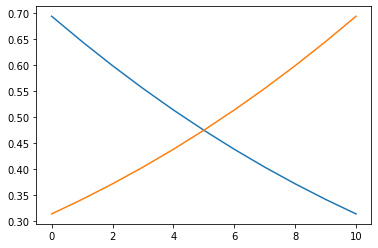

In [5]:
a, b = temp()
print(a)
print(b)
# plt.plot(a)
plt.plot(list(zip(a,b)))

In [6]:
loss = nn.CrossEntropyLoss()

In [7]:
x = F.softmax(torch.FloatTensor([0,0]).unsqueeze(0),1)
x1 = torch.FloatTensor([0.9,0.1]).unsqueeze(0)
y = torch.LongTensor([1])
print(x, x1)
print(y)

output = loss(torch.FloatTensor([1,0]).unsqueeze(0), y)
print(output)

tensor([[0.5000, 0.5000]]) tensor([[0.9000, 0.1000]])
tensor([1])
tensor(1.3133)


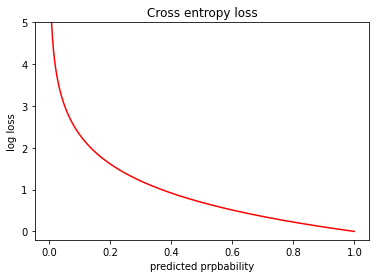

In [8]:
#Redefining our data
Y_pred = torch.linspace(0., 1., 1000)
Y_label = torch.ones(1)
Y_labels = torch.ones(len(Y_pred))

#applying sigmoid
x_entropy_vals = -torch.multiply(Y_label, torch.log(Y_pred)) - torch.multiply((1. - Y_label), torch.log(1. - Y_pred))
#ploting the predicted values against the cross entropy loss
plt.plot(Y_pred, x_entropy_vals, 'r-' )
plt.title('Cross entropy loss')
plt.xlabel('predicted prpbability')
plt.ylabel('log loss')
plt.ylim(-0.2, 5)
plt.show()

In [121]:
input = torch.randn(1, 10, requires_grad=True)
target = torch.empty(1, dtype=torch.long).random_(10)


cross_entropy_loss = nn.CrossEntropyLoss()
output = cross_entropy_loss(input, target)
output.backward()

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[ 0.2304,  1.2993, -0.7590, -0.3731,  2.1350, -1.5443, -0.4921, -1.4430,
         -0.2188, -2.0461]], requires_grad=True)
target:  tensor([0])
output:  tensor(2.5750, grad_fn=<NllLossBackward0>)
